## Table of Contents

- Importing Libraries
- Importing Dataframes
- Exploring Dataframes
- The Elbow Technique
- K-means Clustering

## Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl  # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Importing Dataframes

In [3]:
# Define path
path = r'/Users/isaacotubanjo/Documents/US Gun Violence Analysis'

In [4]:
path

'/Users/isaacotubanjo/Documents/US Gun Violence Analysis'

In [5]:
# Importing dataframe using os path
df_gun = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_gun_violence_data2.pkl'))

## Exploring Dataframes

In [6]:
# Finding the names of columns in the dataframe
df_gun.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'number_killed', 'number_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'number_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [7]:
df_gun.shape

(231432, 22)

In [8]:
df_gun.head(10)

,incident_id,date,state,city_or_county,address,number_killed,number_injured,congressional_district,gun_stolen,gun_type,...,location_description,longitude,number_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,NaN,-79.8559,1.3,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.5,20.5
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,NaN,-118.3330,1.3,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,Cotton Club,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,NaN,-104.8020,1.3,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,NaN,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,1.0,NaN,NaN,...,Fairmont Terrace,-95.9768,1.3,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,NaN,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,2.0,NaN,NaN,...,NaN,-90.0836,1.3,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,93.0,5.0
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,9.0,NaN,NaN,...,NaN,-121.7180,1.3,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,11.0,7.0
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,7.0,NaN,NaN,...,NaN,-76.6412,1.3,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.5,44.0


In [9]:
df_gun.describe()

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
count,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000
mean,0.246889,0.494059,8.000760,37.546385,-89.338708,1.345008,55.457605,20.480897
std,0.519319,0.731467,8.406878,5.131248,14.363537,3.623289,39.152428,13.433975
min,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,33.903250,-94.160350,1.000000,26.000000,9.000000
50%,0.000000,0.000000,5.000000,38.570100,-86.247850,1.000000,55.500000,20.500000
75%,0.000000,1.000000,10.000000,41.435400,-80.045700,1.300000,78.000000,29.000000
max,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.000000


In [11]:
# Checking for missing values
df_gun.isnull().sum()

incident_id                      0
date                             0
state                            0
city_or_county                   0
address                          0
number_killed                    0
number_injured                   0
congressional_district           0
gun_stolen                   99287
gun_type                     99263
incident_characteristics         0
latitude                         0
location_description        191427
longitude                        0
number_guns_involved             0
participant_age              90242
participant_age_group        41094
participant_gender           35538
participant_status           27003
participant_type             24292
state_house_district             0
state_senate_district            0
dtype: int64

In [12]:
# Now, create a subset containing the relevant columns
df_gun_1 = df_gun[['number_killed', 'number_injured', 'congressional_district', 'latitude', 'longitude', 'number_guns_involved', 'state_house_district', 'state_senate_district']]

In [13]:
# Checking results
df_gun_1

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
0,0,4,14.0,40.3467,-79.8559,1.3,55.5,20.5
1,1,3,43.0,33.9090,-118.3330,1.3,62.0,35.0
2,1,3,9.0,41.4455,-82.1377,2.0,56.0,13.0
3,4,0,6.0,39.6518,-104.8020,1.3,40.0,28.0
4,2,2,6.0,36.1140,-79.9569,2.0,62.0,27.0
...,...,...,...,...,...,...,...,...
239671,0,0,5.0,47.6638,-117.2350,1.0,4.0,4.0
239673,1,0,4.0,31.7537,-93.0836,1.0,23.0,31.0
239674,0,1,2.0,29.9239,-90.0442,1.0,85.0,7.0
239675,1,0,9.0,29.7201,-95.6110,1.0,149.0,17.0


In [14]:
# Checking for missing values
df_gun_1.isnull().sum()

number_killed             0
number_injured            0
congressional_district    0
latitude                  0
longitude                 0
number_guns_involved      0
state_house_district      0
state_senate_district     0
dtype: int64

No missing values in the subset

## The Elbow Technique

In [15]:
num_cl = range(1, 10) # This defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # This defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_gun_1).score(df_gun_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/isaacotubanjo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/isaacotubanjo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/isaacotubanjo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/isaacotubanjo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

[-469951594.8463298,
 -243994800.02756464,
 -176115880.95228997,
 -149348665.77974445,
 -126542800.7033413,
 -105542194.54104847,
 -93849613.0772703,
 -83832277.269968,
 -77023147.85457927]

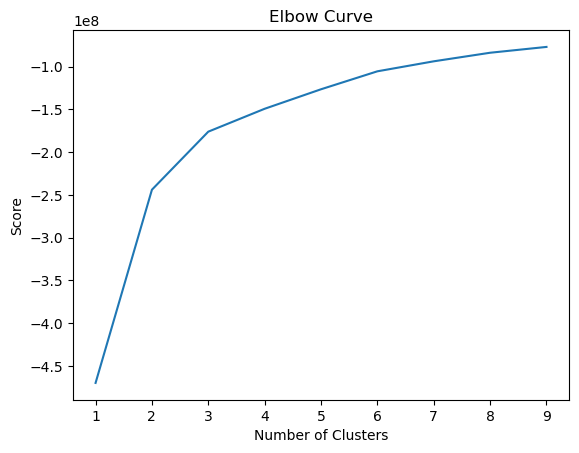

In [17]:
# Plotting the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this graph, the curve rises rapidly from one to three but there is not much change after that. The optimal cluster count should be three.

## K-means Clustering

In [19]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [20]:
# Fit the k-means object to the dataframe.
kmeans.fit(df_gun_1)

/Users/isaacotubanjo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
df_gun_1['clusters'] = kmeans.fit_predict(df_gun_1)

/Users/isaacotubanjo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/kg/f38q3svs3lgc6yvw293mvtlr0000gn/T/ipykernel_85717/3955661595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gun_1['clusters'] = kmeans.fit_predict(df_gun_1)


In [22]:
df_gun_1.head()

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district,clusters
0,0,4,14.0,40.3467,-79.8559,1.3,55.5,20.5,0
1,1,3,43.0,33.9090,-118.3330,1.3,62.0,35.0,0
2,1,3,9.0,41.4455,-82.1377,2.0,56.0,13.0,0
3,4,0,6.0,39.6518,-104.8020,1.3,40.0,28.0,0
4,2,2,6.0,36.1140,-79.9569,2.0,62.0,27.0,0


In [23]:
df_gun_1['clusters'].value_counts()

0    99561
1    86009
2    45862
Name: clusters, dtype: int64

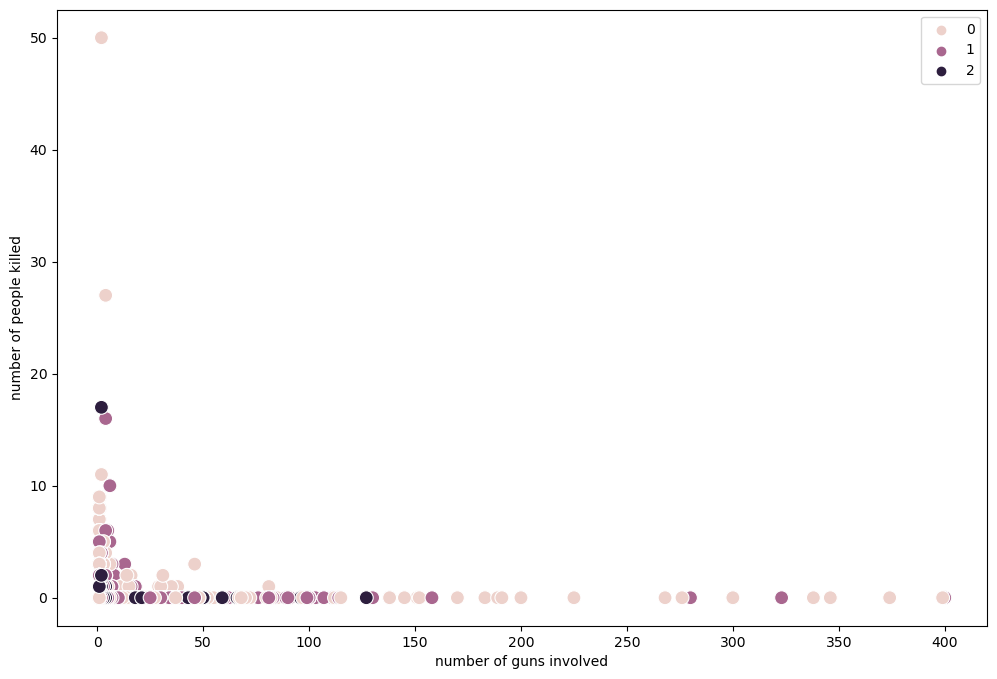

In [24]:
# Plot the clusters for the "number_guns_involved" and "number_killed" variables.
plt.figure(figsize=(12,8))
plot_1 = ax = sns.scatterplot(x=df_gun_1['number_guns_involved'], y=df_gun_1['number_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number of guns involved') # Label x-axis.
plt.ylabel('number of people killed') # Label y-axis.
plt.show()

There is not much difference between the insights that can be gotten from this illustration and the previous scatterplot gotten from the regression analysis.

One major difference that I have noticed is that there seems to be higher deaths when less guns are involved. The data points higher than 1 on the y axis are all within 50 or less on the x axis. I suppose this indicates that there are usually no casualties once the number of guns increase above 50.

In [25]:
# Exporting visualization
plot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustering_scatterplot1.png'))

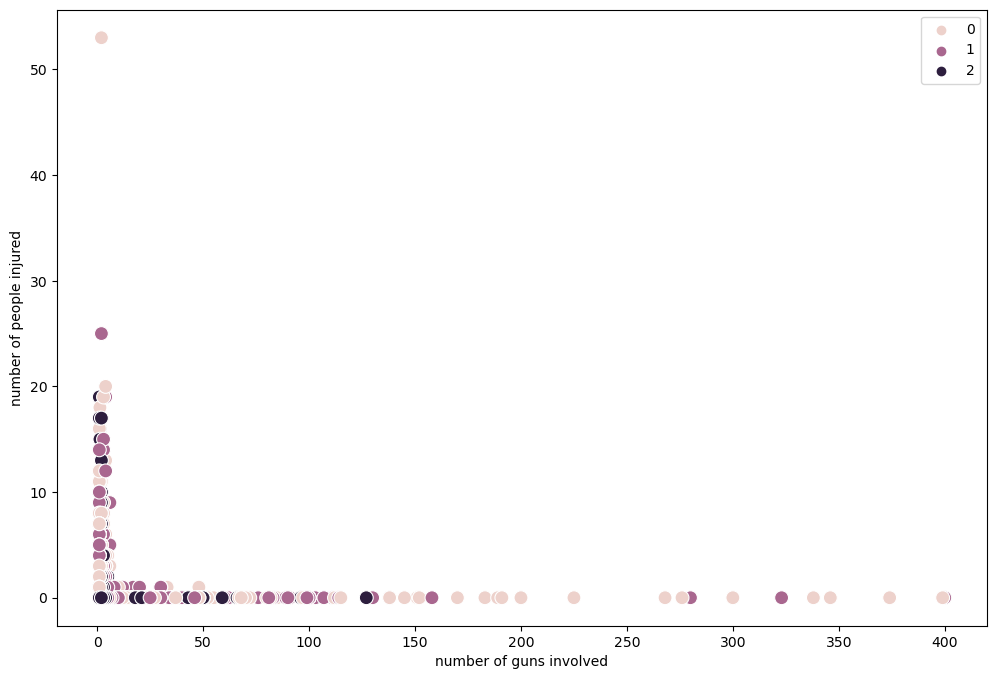

In [26]:
# Plot the clusters for the "number_guns_involved" and "number_injured" variables.
plt.figure(figsize=(12,8))
plot_2 = ax = sns.scatterplot(x=df_gun_1['number_guns_involved'], y=df_gun_1['number_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number of guns involved') # Label x-axis.
plt.ylabel('number of people injured') # Label y-axis.
plt.show()

This follows the same pattern as the previous scatterplot. We can notice a similar trend of almost no injuries once the number of guns are higher than 50

In [27]:
# Exporting visualization
plot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustering_scatterplot2.png'))

In [29]:
df_gun_1.loc[df_gun_1['clusters'] == 2, 'cluster'] = 'dark purple'
df_gun_1.loc[df_gun_1['clusters'] == 1, 'cluster'] = 'purple'
df_gun_1.loc[df_gun_1['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/kg/f38q3svs3lgc6yvw293mvtlr0000gn/T/ipykernel_85717/3932558681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gun_1.loc[df_gun_1['clusters'] == 2, 'cluster'] = 'dark purple'


In [30]:
df_gun_1.groupby('cluster').agg({'number_killed':['mean', 'median'], 
                         'number_injured':['mean', 'median'], 
                         'number_guns_involved':['mean', 'median'], 
                                 'state_senate_district':['mean', 'median']})

number_killed        number_injured        number_guns_involved  \
                     mean median           mean median                 mean   
cluster                                                                       
dark purple      0.242706    0.0       0.481139    0.0             1.288276   
pink             0.244875    0.0       0.468316    0.0             1.389629   
purple           0.251450    0.0       0.530747    0.0             1.323607   

                   state_senate_district         
            median                  mean median  
cluster                                          
dark purple    1.0             29.295724   30.0  
pink           1.0             23.339887   20.5  
purple         1.0             12.471160    9.0

The dark purple has some strong statistics here with the highest state senate district and the lowest mean in the number killed and number of guns involved categories. It also has the second lowest mean in the number injured category.